In [1]:
import numpy as np
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
dados = xr.open_dataset('sst_ndjfm_anom.nc')
tsm = dados.sst
print(tsm)

<xarray.DataArray 'sst' (time: 50, latitude: 18, longitude: 30)> Size: 216kB
[27000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 400B 1963-01-15T12:00:00 ... 2012-01-16
  * latitude   (latitude) float32 72B -22.5 -17.5 -12.5 -7.5 ... 52.5 57.5 62.5
  * longitude  (longitude) float32 120B 117.5 122.5 127.5 ... 252.5 257.5 262.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      NDJFM mean SST anomalies


In [3]:
# transforma o dado 3D (time, lat e lon) em 2D (time, pontos de grade)
# a ACP será aplicada a esses dados.
tsm_2D = tsm.stack(pontos = ('latitude','longitude'))
print(tsm_2D)

<xarray.DataArray 'sst' (time: 50, pontos: 540)> Size: 216kB
array([[ 0.43180798,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.29283554,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.28564902,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.32797353,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.78292718,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.55678949,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * time       (time) datetime64[ns] 400B 1963-01-15T12:00:00 ... 2012-01-16
  * pontos     (pontos) object 4kB MultiIndex
  * latitude   (pontos) float32 2kB -22.5 -22.5 -22.5 -22.5 ... 62.5 62.5 62.5
  * longitude  (pontos) float32 2kB 117.5 122.5 127.5 ... 252.5 257.5 262.5
Attributes:
    standard_name:  sea

In [4]:
# aqui, cria-se um arranjo 1D, cuja estrutura servirá para criar
# o DataArray 2D para os padrões, contendo as coordenadas espaciais
tsm_dp_1D = tsm_2D.dropna(dim='pontos').std(dim='time')
print (tsm_dp_1D )

<xarray.DataArray 'sst' (pontos: 450)> Size: 4kB
array([0.51152379, 0.37493966, 0.29047127, 0.26170865, 0.29938732,
       0.35392465, 0.41379639, 0.42733909, 0.42005073, 0.44567562,
       0.48280688, 0.5569946 , 0.57544367, 0.5610063 , 0.48613483,
       0.45268683, 0.38312324, 0.36802196, 0.35852986, 0.32023718,
       0.32830262, 0.3761616 , 0.45328136, 0.55574177, 0.57914942,
       0.34718635, 0.43864359, 0.39931338, 0.32642927, 0.28279832,
       0.30316251, 0.33138076, 0.39393393, 0.4025588 , 0.36533828,
       0.29478768, 0.28566788, 0.33613716, 0.33318757, 0.35381778,
       0.36447448, 0.39465117, 0.42919223, 0.4515484 , 0.50282969,
       0.51693918, 0.49534795, 0.46403935, 0.49210866, 0.49284196,
       0.50613536, 0.50104105, 0.32416495, 0.37515395, 0.54893494,
       0.49493826, 0.39961162, 0.34989739, 0.34196044, 0.31875564,
       0.29994356, 0.3125842 , 0.359205  , 0.37346899, 0.32284061,
       0.27559715, 0.28663466, 0.39533187, 0.38145001, 0.47251929,
       0.5136

In [5]:
# retirando os NaNs dos dados, o que impossibilita o cálculo dos autovetores e autovalores
tsm_2D_noNAN = tsm_2D.dropna( dim='pontos' )
print(tsm_2D_noNAN)

<xarray.DataArray 'sst' (time: 50, pontos: 450)> Size: 180kB
array([[ 0.43180798,  0.1630861 ,  0.08017219, ..., -0.12540398,
        -0.49084109,  1.06179475],
       [ 0.29283554, -0.16680923, -0.21215791, ..., -0.12209211,
        -0.09883553,  0.55590133],
       [-0.28564902, -0.41418546, -0.2408477 , ..., -0.06737086,
        -0.32778147, -0.23831127],
       ...,
       [ 0.32797353,  0.29415896,  0.36296028, ...,  0.76847685,
         0.57203314, -0.42251657],
       [ 0.78292718,  0.14445034,  0.25374836, ...,  0.93450998,
         0.02784106, -0.64168214],
       [ 0.55678949,  0.17888817,  0.29620397, ...,  0.77207239,
         0.45855923, -0.74340134]])
Coordinates:
  * time       (time) datetime64[ns] 400B 1963-01-15T12:00:00 ... 2012-01-16
  * pontos     (pontos) object 4kB MultiIndex
  * latitude   (pontos) float32 2kB -22.5 -22.5 -22.5 -22.5 ... 62.5 62.5 62.5
  * longitude  (pontos) float32 2kB 117.5 147.5 152.5 ... 177.5 182.5 212.5
Attributes:
    standard_name:  sea

In [6]:
cov_tsm = np.cov( tsm_2D_noNAN, rowvar=False )
print(cov_tsm)
print(cov_tsm.shape)

[[ 0.26699652 -0.01595112 -0.0246991  ... -0.05169606 -0.09380417
  -0.02858677]
 [-0.01595112  0.14344873  0.0958692  ... -0.0021458  -0.0123615
   0.02514913]
 [-0.0246991   0.0958692   0.08609547 ...  0.04424524  0.03284543
   0.01117142]
 ...
 [-0.05169606 -0.0021458   0.04424524 ...  0.30499503  0.28988373
   0.01700094]
 [-0.09380417 -0.0123615   0.03284543 ...  0.28988373  0.3345274
   0.01886101]
 [-0.02858677  0.02514913  0.01117142 ...  0.01700094  0.01886101
   0.37094444]]
(450, 450)


In [9]:
autos = np.linalg.eig( cov_tsm )

In [10]:
print( autos.eigenvalues )

[ 6.04508073e+01+0.00000000e+00j  1.73071607e+01+0.00000000e+00j
  9.96924385e+00+0.00000000e+00j  9.28291120e+00+0.00000000e+00j
  5.80943094e+00+0.00000000e+00j  3.97210716e+00+0.00000000e+00j
  3.02104851e+00+0.00000000e+00j  2.86120977e+00+0.00000000e+00j
  2.44229287e+00+0.00000000e+00j  1.83051287e+00+0.00000000e+00j
  1.48695193e+00+0.00000000e+00j  1.40110812e+00+0.00000000e+00j
  1.17392424e+00+0.00000000e+00j  1.04569778e+00+0.00000000e+00j
  9.66454355e-01+0.00000000e+00j  8.78544912e-01+0.00000000e+00j
  7.37808715e-01+0.00000000e+00j  6.80884631e-01+0.00000000e+00j
  6.41725705e-01+0.00000000e+00j  5.94347969e-01+0.00000000e+00j
  5.34377708e-01+0.00000000e+00j  4.93939102e-01+0.00000000e+00j
  4.03652014e-01+0.00000000e+00j  3.94794953e-01+0.00000000e+00j
  3.74301345e-01+0.00000000e+00j  2.94369602e-01+0.00000000e+00j
  2.80962136e-01+0.00000000e+00j  2.50262724e-01+0.00000000e+00j
  2.18057126e-01+0.00000000e+00j  2.01798980e-01+0.00000000e+00j
  1.77016365e-01+0.000000

In [14]:
print( autos.eigenvectors )
print( autos.eigenvectors.shape )

[[ 0.02267507+0.j          0.00688814+0.j          0.03975616+0.j
  ... -0.0022165 -0.00069742j -0.00440175+0.j
   0.0001633 +0.j        ]
 [-0.00644526+0.j          0.00401525+0.j         -0.04164062+0.j
  ...  0.00237471+0.00051655j  0.00358648+0.j
   0.00329855+0.j        ]
 [-0.00328661+0.j          0.01998391+0.j         -0.04615435+0.j
  ... -0.00321531-0.00205809j -0.00514326+0.j
  -0.0044634 +0.j        ]
 ...
 [-0.01627088+0.j          0.04836496+0.j         -0.08439281+0.j
  ... -0.03200982-0.03041198j -0.04302332+0.j
  -0.00790028+0.j        ]
 [-0.02024751+0.j          0.01906247+0.j         -0.08953874+0.j
  ... -0.04017302-0.01144769j -0.03888429+0.j
  -0.02259075+0.j        ]
 [-0.02226787+0.j         -0.01324967+0.j         -0.085949  +0.j
  ... -0.02970536+0.00868958j -0.02523323+0.j
  -0.02106057+0.j        ]]
(450, 450)


In [8]:
print(autos.eigenvectors.shape)

(450, 450)


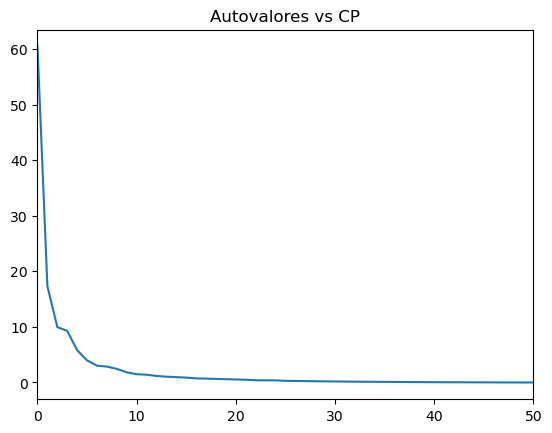

In [12]:
plt.plot(autos.eigenvalues.real)
plt.xlim(0,50)
plt.title('Autovalores vs CP')
plt.show()

In [15]:
vetor1 = autos.eigenvectors[:,0].real * np.sqrt( autos.eigenvalues[0].real ) / tsm_dp_1D
print(vetor1.min())
print(vetor1.max())

<xarray.DataArray 'sst' ()> Size: 8B
array(-0.97399511)
<xarray.DataArray 'sst' ()> Size: 8B
array(0.78626716)


In [21]:
# usando a DataArray da média do campo de TSM em 1D para fornecer coordenadas ao primeiro autovetor
padrao1 = tsm_dp_1D.copy( data = vetor1*(-1) ).unstack()
print(padrao1)

<xarray.DataArray 'sst' (latitude: 18, longitude: 30)> Size: 4kB
array([[-0.34465438,         nan,         nan,         nan,         nan,
                nan,  0.13365345,  0.08797239, -0.11060239, -0.19567852,
        -0.3322133 , -0.50666291, -0.60970456, -0.66637839, -0.65521013,
        -0.58311566, -0.54809469, -0.56649082, -0.53753608, -0.39833548,
        -0.27769686, -0.23286959, -0.14812631, -0.02176744,  0.1650222 ,
         0.25490247,  0.31564187,  0.448953  ,  0.40658403,  0.3783725 ],
       [-0.09990055,  0.1376044 ,         nan,         nan,         nan,
         0.18954213,  0.04649578, -0.15873456, -0.23686057, -0.23566329,
        -0.31145934, -0.47606341, -0.617427  , -0.58249949, -0.33378804,
        -0.16186127, -0.0779253 ,  0.02935143,  0.21978352,  0.44544262,
         0.5705442 ,  0.64656775,  0.71870982,  0.75242193,  0.74555041,
         0.74375601,  0.68788117,  0.58653631,  0.56153248,  0.52378294],
       [ 0.31462734,  0.36600644,  0.31179864,  0.2312080

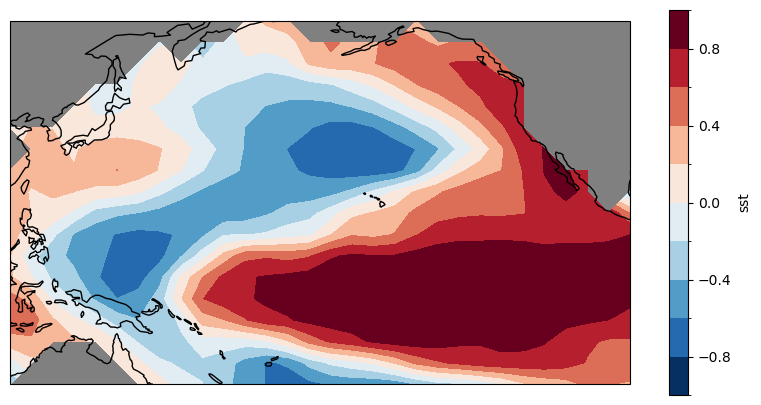

In [22]:
# plotando o campo do padrão 1
plt.figure(figsize=(10,5))
mapa = padrao1.plot.contourf(
    subplot_kws=dict(projection=ccrs.PlateCarree(central_longitude=-170), facecolor="gray"),
    transform=ccrs.PlateCarree(),levels = np.linspace(-1, 1, 11) )
mapa.axes.coastlines()
plt.show()

In [18]:
# Séries temporais
CP1 = tsm_2D_noNAN.values @ autos.eigenvectors[:,0].real
print(CP1)

[  1.56206138  -3.41439788   4.73689367  -9.68273544   1.42135771
   3.53843076  -5.81590142  -6.71421263  11.25983038   5.86581856
 -10.31622358  13.10668384   5.22307066  12.04273943  -7.23812462
  -5.94195023  -1.472338    -6.81975133  -1.76051395  -1.56817116
 -17.68086888  -1.30575598   4.40353496  -0.20857557 -11.29170467
  -9.30042535  10.88168939  -1.60069674  -3.43406056 -11.62353156
  -7.05531921  -6.17586707  -7.49496539   1.41052809  -0.20625006
 -19.08036152   6.76000805   9.22883818   2.53224556   0.03945277
 -10.17610739  -4.55901892  -6.41422507   1.65508828  -6.17387937
  10.38754129   3.72903947 -10.7913205   11.12472435   6.70353034]


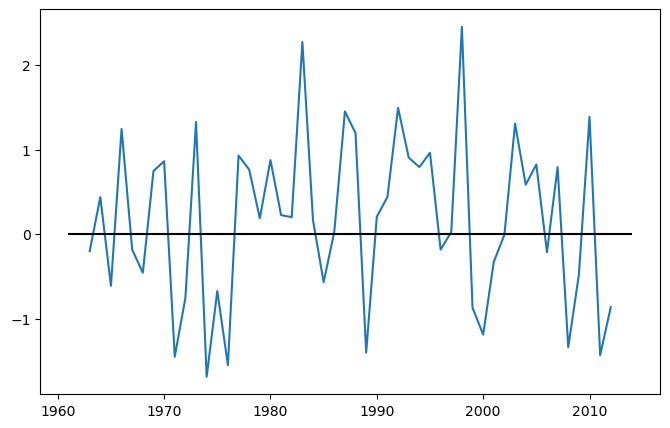

In [20]:
# série temporal do primeiro padrão
anos = tsm.time.dt.year
plt.figure(figsize=(8,5))
plt.plot( anos.values, CP1 / np.sqrt( autos.eigenvalues[0].real )*(-1) )  # normalizando variância da CP
plt.hlines(0,xmin=anos.min()-2,xmax=anos.max()+2,color='black')
plt.show()